<a href="https://colab.research.google.com/github/Ritil-Ranjan/Youtube/blob/main/Youtube7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.2 MB/s eta 0:00:00


In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_distances
import pandas as pd
import numpy as np

In [3]:
# 3. Example list of comments
comments = [
    "India is the world's 7th largest country.",
    "Chinese people speak Chinese language.",
    "Russia is the world's largest country.",
    "India has 2nd highest population in the world.",
    "China does not support any religion",
    "Taj Mahal is located in India.",
    "In 1991, USSR disintegrated into Russia and some other small countries.",
    "China has the highest population in the world.",
    "Moscow is the capital of Russia.",
    "New Delhi is the capital of India."
]

In [7]:
df = pd.DataFrame(comments, columns=['comment'])

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')  # small and fast; good balance
embeddings = model.encode(comments, convert_to_tensor=True, show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
cosine_dist = cosine_distances(embeddings.cpu())

In [26]:
# eps ~ max distance between two samples to be considered in the same cluster
# tweak eps depending on how tight you want clusters
dbscan = DBSCAN(eps=0.3, min_samples=2, metric='precomputed')
labels = dbscan.fit_predict(cosine_dist)

In [27]:
df['cluster'] = labels

# View size of each cluster
cluster_sizes = df['cluster'].value_counts().sort_index()
print("Cluster sizes:\n", cluster_sizes)

# View example comments from each cluster
for label in sorted(set(labels)):
    print(f"\nCluster {label} ({(df['cluster']==label).sum()} comments):")
    for comment in df[df['cluster'] == label]['comment']:
        print(f"- {comment}")

Cluster sizes:
 cluster
-1    10
Name: count, dtype: int64

Cluster -1 (10 comments):
- India is the world's 7th largest country.
- Chinese people speak Chinese language.
- Russia is the world's largest country.
- India has 2nd highest population in the world.
- China does not support any religion
- Taj Mahal is located in India.
- In 1991, USSR disintegrated into Russia and some other small countries.
- China has the highest population in the world.
- Moscow is the capital of Russia.
- New Delhi is the capital of India.


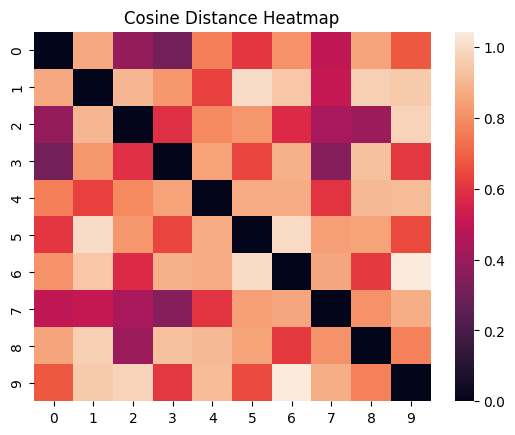

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cosine_dist[:50, :50])  # sample 50 for clarity
plt.title("Cosine Distance Heatmap")
plt.show()